# AdaBoostClassifier

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('A.csv')
df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [3]:
del df['FileName']
del df['Date']
del df['SegFile']

In [4]:
df = df.drop_duplicates()
sum(df.duplicated())

0

In [5]:
df=df.dropna()
df

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,2059.0,2867.0,140.0,140.0,0.0,0.0,6.0,79.0,0.2,25.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2122,1576.0,2867.0,140.0,140.0,1.0,0.0,9.0,78.0,0.4,22.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2123,1576.0,2596.0,140.0,140.0,1.0,0.0,7.0,79.0,0.4,20.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2124,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,78.0,0.4,27.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0


In [6]:
df.columns

Index(['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV',
       'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode',
       'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD',
       'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP'],
      dtype='object')

In [7]:
x = df.drop(labels='NSP', axis=1)
y = df.loc[:,'NSP']

In [8]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x,y)
print("OUR DATASET COUNT         : ", Counter(y))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({2.0: 1648, 1.0: 1648, 3.0: 1648})
OVER SAMPLING DATA COUNT  :  Counter({2.0: 1648, 1.0: 1648, 3.0: 1648})


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1, stratify=y)
print("Number of training dataset : ", len(x_train))
print("Number of test dataset     : ", len(x_test))
print("Total number of dataset    : ", len(x_train)+len(x_test))

Number of training dataset :  3955
Number of test dataset     :  989
Total number of dataset    :  4944


In [10]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [11]:
ADC = AdaBoostClassifier()
ADC.fit(x_train,y_train)
predicted = ADC.predict(x_test)

In [12]:
cr = classification_report(y_test,predicted)
print('Classification report of AdaBoostClassifier Result is:\n',cr)
print("\n")

Classification report of AdaBoostClassifier Result is:
               precision    recall  f1-score   support

         1.0       0.92      0.45      0.60       329
         2.0       0.59      0.96      0.73       330
         3.0       1.00      0.88      0.94       330

    accuracy                           0.76       989
   macro avg       0.84      0.76      0.76       989
weighted avg       0.84      0.76      0.76       989





In [13]:
cm = confusion_matrix(y_test,predicted)
print('Confusion Matrix result of AdaBoostClassifier is:',cm)
print("\n")

Confusion Matrix result of AdaBoostClassifier is: [[147 182   0]
 [ 13 317   0]
 [  0  40 290]]




In [14]:
accuracy = cross_val_score(ADC, x, y, scoring='accuracy')
print('Cross validation test results of accuracy:', accuracy)
print("\n")

Cross validation test results of accuracy: [0.79575329 0.72194135 0.83822042 0.72699697 0.79554656]




In [15]:
a = accuracy.mean() * 100
print("Accuracy Result of AdaBoostClassifier is:",a)

Accuracy Result of AdaBoostClassifier is: 77.56917182120736


Confusion matrix-AdaBoostClassifier:
[[147 182   0]
 [ 13 317   0]
 [  0  40 290]]


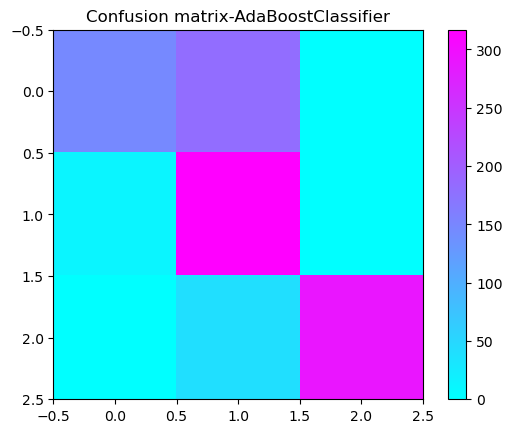

In [16]:
def plot_confusion_matrix(cm, title='Confusion matrix-AdaBoostClassifier', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('Confusion matrix-AdaBoostClassifier:')
print(cm)
plot_confusion_matrix(cm)

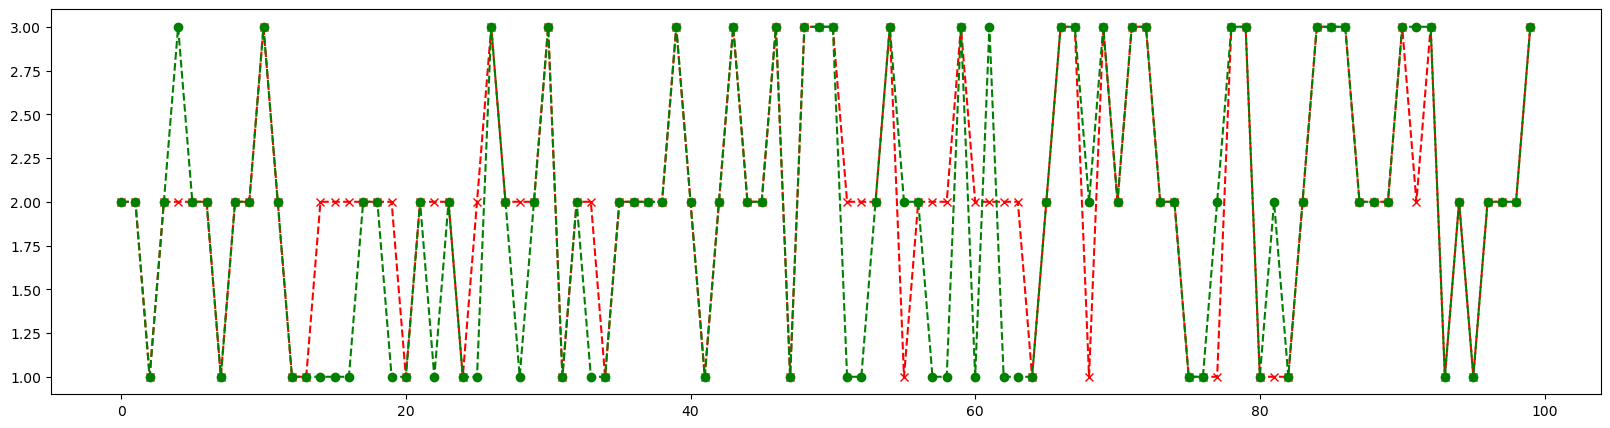

In [17]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [18]:
import joblib
joblib.dump(ADC,'MODEL.pkl')

['MODEL.pkl']